## Supply Chain Analytics -- Predicting Backorder
 This project involves creating various classification moderls to predict weather the company will go to backorder or not, wsing various features like past sales, forecast ect.

## Importing data and Preliminary Analysis

In [2]:
#importing the required packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, precision_recall_curve

In [3]:
df=pd.read_csv('Backorder_Dataset_v2.csv')

In [4]:
# Preliminary look at the data set to get a basic idea
pd.set_option('display.max_columns', None) # to Show all the columns, otherwise truncated.
df.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,No
1,1043384,2,9.0,0,0,0,0,0,0,0,0,0,No,0,0.99,0.99,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,0,0,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
3,1043852,7,8.0,0,0,0,0,0,0,0,0,1,No,0,0.10,0.13,0,No,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,4,2,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
5,1044198,13,8.0,0,0,0,0,0,0,0,0,0,No,0,0.82,0.87,0,No,No,No,Yes,No,No
6,1044643,1095,NaN,0,0,0,0,0,0,0,0,4,No,0,-99.00,-99.00,0,Yes,No,No,Yes,No,No
7,1045098,6,2.0,0,0,0,0,0,0,0,0,0,No,0,0.00,0.00,0,Yes,No,Yes,Yes,No,No
8,1045815,140,NaN,0,15,114,152,0,0,0,0,0,No,0,-99.00,-99.00,0,No,No,No,Yes,No,No
9,1045867,4,8.0,0,0,0,0,0,0,0,0,0,No,0,0.82,0.87,0,No,No,No,Yes,No,No


In [5]:
# Knowing about the features present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n

In [6]:
# Summarise various numerical and non-numerical variables in data
df.describe()


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.048575e+06,1.048575e+06,984057.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.773693e+06,4.894183e+02,7.841783,4.535695e+01,1.852255e+02,3.608835e+02,5.289138e+02,5.730150e+01,1.804613e+02,3.524633e+02,5.443309e+02,5.413719e+01,3.289722e+00,-7.049983e+00,-6.618981e+00,6.324040e-01
std,3.995772e+05,2.859583e+04,7.037158,1.390535e+03,5.032302e+03,1.006764e+04,1.489545e+04,2.067927e+03,5.263481e+03,9.773354e+03,1.519565e+04,1.244245e+03,2.994339e+02,2.683685e+01,2.613766e+01,3.517768e+01
min,1.026827e+06,-1.349100e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,1.373916e+06,4.000000e+00,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.810846e+06,1.500000e+01,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.000000e-01,0.000000e+00
75%,2.072990e+06,8.000000e+01,9.000000,0.000000e+00,5.000000e+00,1.200000e+01,2.100000e+01,4.000000e+00,1.500000e+01,3.200000e+01,4.800000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,3.284914e+06,1.233440e+07,52.000000,4.894080e+05,1.218328e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.094112e+06,2.146625e+06,3.201035e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [7]:
df.describe(include=['O'])

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,1047903,795558,1048416,921111,1011639,1048117,1039675


In [8]:
# it is obsetrved that all the varaiables are either Yes or No(Binary)

In [9]:
# since it is a classification problem it's better to check the distribution of the target variable(went_on_backorder)

C:\Users\chund\anaconda3\envs\scaproject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


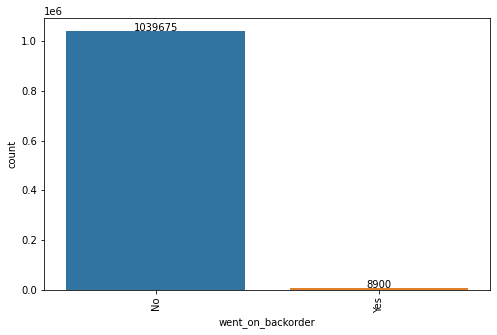

In [10]:
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(df.went_on_backorder)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['went_on_backorder'].value_counts()[i],ha="center")
    i += 1

In [11]:
print("percentage of 'Yes' is", round(float(8900/1039675)*100,5))

percentage of 'Yes' is 0.85604


It can be seen that percentage of yes is very small, therefore the dataset needs to be balanced before training. Some models performs good only when the training data set is balanced, on the other hand some models are immune to unbalanced data.
lets build models on both balanced and unbalanced data and do a comparision.

It can be observed that the first column is Stock keeping unit(SKU), the main purpose of SKU is to identify stock, hence it is better to identify any repetition and delete the occurance if any present.

## Findings from preliminary analysis

* Out of 23 columns 16 are numeric (integer/ floating point) and 7 are categorical. <br />
* The categorical variables should be encoded to include them in the training. <br />
* The feature 'lead time' contain less number of observations than the number of rows in the dataframe, it implies some missing values and needed to be treated. <br />
* It can be seen that percentage of yes is very small, therefore the dataset needs to be balanced before training. Some models performs good only when the training data set is balanced, on the other hand some models are immune to unbalanced data. lets build models on both balanced and unbalanced data and do a comparision. <br />
* It can be observed that the first column is Stock keeping unit(SKU), the main purpose of SKU is to identify stock, hence it is better to identify any repetition and delete the occurance if any presentalso it is safe to drop sku feature becaues it does not play any role in the predictition.  <br />



## Data Cleaning

### Dropping sku

In [13]:
df.sku.unique().shape

(1048575,)

In [14]:
len(df.sku)-len(df.sku.drop_duplicates())

0

In [15]:
# it can be seen that there are no repetition and hence we dont have to drop anything.
# Also as the SKU does not play role in the predictition we can drop the feature.

In [16]:
# dropping SKU
df= df.drop('sku', axis=1)

### Encoding the categorical variables

In [17]:
df.describe(include=['O']).columns.values

array(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'], dtype=object)

In [18]:
for var in list(df.describe(include=['O']).columns.values):
    df[var]= df[var].map({'No':0, 'Yes': 1})

In [19]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,0,0,0,1,0,0
1,2,9.0,0,0,0,0,0,0,0,0,0,0,0,0.99,0.99,0,0,0,0,1,0,0
2,2,NaN,0,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,1,0,0,1,0,0
3,7,8.0,0,0,0,0,0,0,0,0,1,0,0,0.10,0.13,0,0,0,0,1,0,0
4,8,NaN,0,0,0,0,0,0,0,4,2,0,0,-99.00,-99.00,0,1,0,0,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1048575 non-null  int64  
 1   lead_time          984057 non-null   float64
 2   in_transit_qty     1048575 non-null  int64  
 3   forecast_3_month   1048575 non-null  int64  
 4   forecast_6_month   1048575 non-null  int64  
 5   forecast_9_month   1048575 non-null  int64  
 6   sales_1_month      1048575 non-null  int64  
 7   sales_3_month      1048575 non-null  int64  
 8   sales_6_month      1048575 non-null  int64  
 9   sales_9_month      1048575 non-null  int64  
 10  min_bank           1048575 non-null  int64  
 11  potential_issue    1048575 non-null  int64  
 12  pieces_past_due    1048575 non-null  int64  
 13  perf_6_month_avg   1048575 non-null  float64
 14  perf_12_month_avg  1048575 non-null  float64
 15  local_bo_qty       1048575 non-n

In [21]:
# we can see that all the variables are now numeric type.

### Missing value treatmrnt

In [22]:
# lets check all the missing values and percentage of missing values, this is very important to decide which tratment.

In [23]:
def mis_value_analysis(data):
    count_missing = data.isnull().sum()
    percent_missing = data.isnull().sum() * 100 / len(df)
    return pd.DataFrame({'variable_name': data.columns,
                         'count_missing': count_missing,
                         'percent_missing': percent_missing})


In [24]:
mis_value_analysis(df)

,variable_name,count_missing,percent_missing
national_inv,national_inv,0,0.000000
lead_time,lead_time,64518,6.152922
in_transit_qty,in_transit_qty,0,0.000000
forecast_3_month,forecast_3_month,0,0.000000
forecast_6_month,forecast_6_month,0,0.000000
forecast_9_month,forecast_9_month,0,0.000000
sales_1_month,sales_1_month,0,0.000000
sales_3_month,sales_3_month,0,0.000000
sales_6_month,sales_6_month,0,0.000000
sales_9_month,sales_9_month,0,0.000000


<AxesSubplot:>

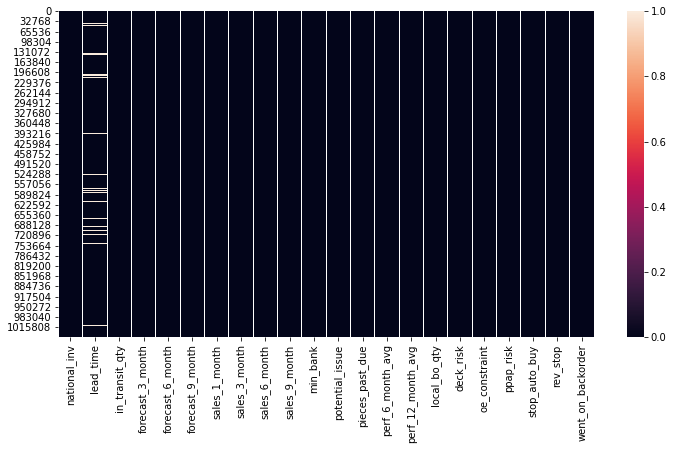

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

The table and map shows that the there are 64518 missing values in lead_time and they are spread randomly across the length of the column.

The percentage of the missing values is considerable, and hence we cannot delete the missing values as it may lead to loss of very less 'Yes' observations in the backorder feature.Therefore, we need to impute the missing values to avoid data loss.

In [26]:
# imput missingvalues

<AxesSubplot:ylabel='Frequency'>

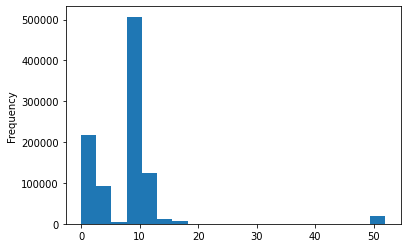

In [27]:
# lets check the distribution of lead time
df.lead_time.plot.hist(bins=20)

Most of the leadtime are close to 7 to 10 days and very few greater than 20.

Usually companies try to meet the target lead time and acheive the target most of the times, and therefore it is better to impute the missing values with mode lead time.

In [30]:
df.lead_time= df.lead_time.fillna(df.lead_time.mode()[0])

In [31]:
mis_value_analysis(df)

,variable_name,count_missing,percent_missing
national_inv,national_inv,0,0.0
lead_time,lead_time,0,0.0
in_transit_qty,in_transit_qty,0,0.0
forecast_3_month,forecast_3_month,0,0.0
forecast_6_month,forecast_6_month,0,0.0
forecast_9_month,forecast_9_month,0,0.0
sales_1_month,sales_1_month,0,0.0
sales_3_month,sales_3_month,0,0.0
sales_6_month,sales_6_month,0,0.0
sales_9_month,sales_9_month,0,0.0


### Exploratory Data Analysis

In [32]:
#lets check the correlation plot

<AxesSubplot:>

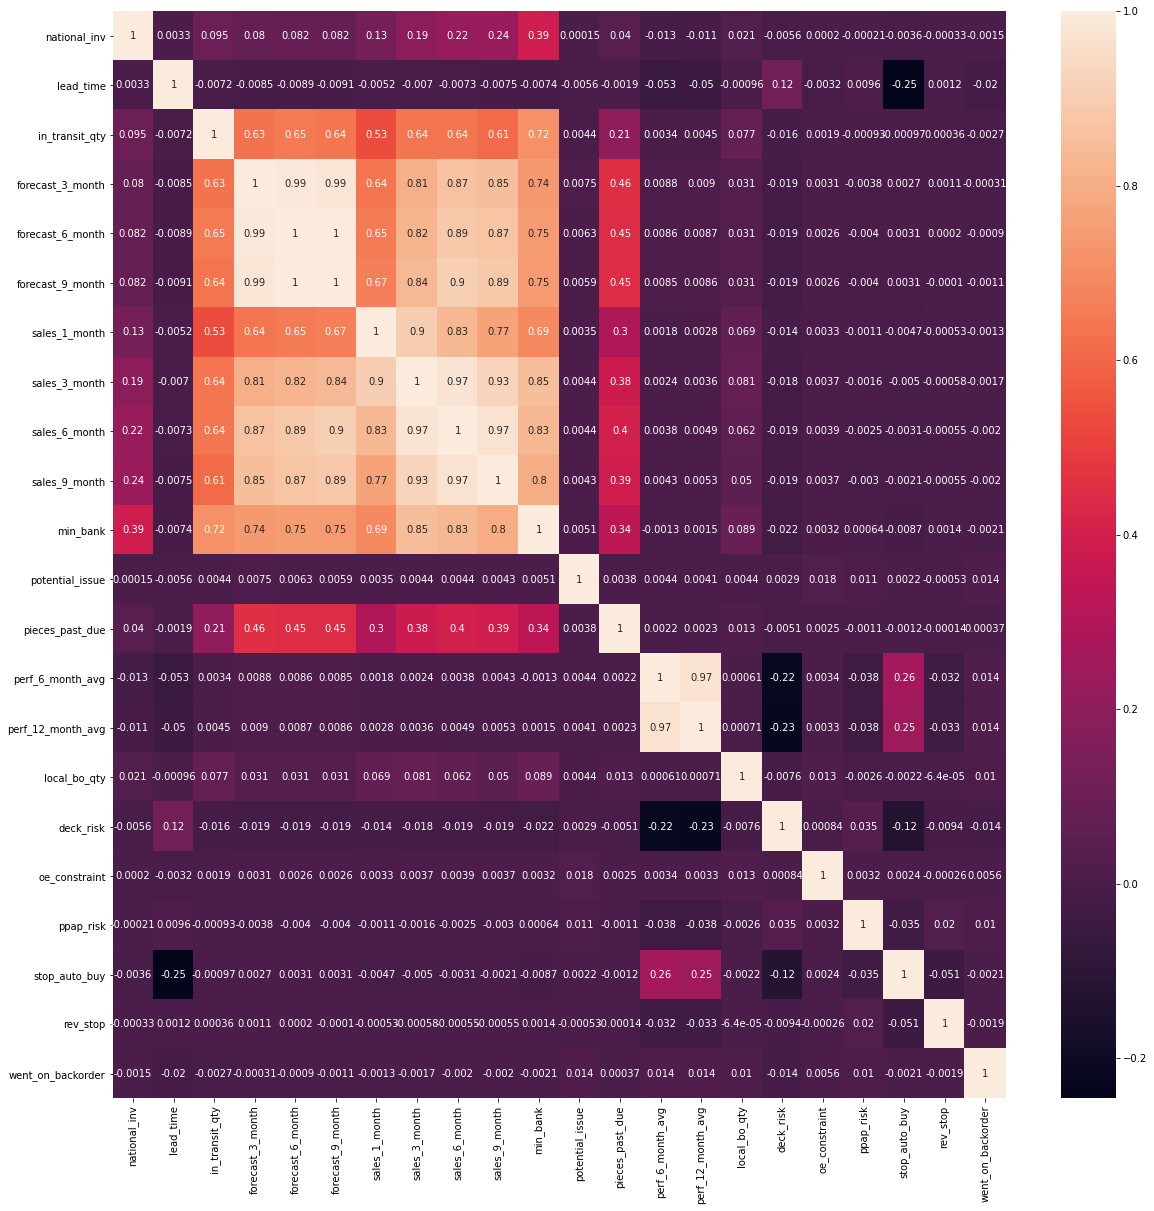

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot =True)

The correlation matrix shows that quantity in transit, the forecast and actual sales and minimum recomended stock level are highly corelated. These correlations are obvious as the sales are as if the sales are high then the forecast, stock in hand and transit will also be high.

It is observed that the sales over last one month, last three months, last six months and last niner months are highly corellated. this correlation suggests that the sales do not exhuibit seasonality.

All the above correlations suggest that we have the freedom to leave ot some of the features based upon the performance. Lets see....!

### Balancing the data set

Reason for balancing the data: Lets check what happens if any model predicts only 'No' (Naive model) becasue of training on unbalanced dataset

In [38]:
naive_pred_Y= np.zeros(df.shape[0])
actual_Y= np.array(df.went_on_backorder)


In [39]:
# confusion matrix 
confusion_matrix(actual_Y, naive_pred_Y)

array([[1039675,       0],
       [   8900,       0]], dtype=int64)

In [40]:
print("Accuracy of naive classifier is:", accuracy_score(actual_Y, naive_pred_Y)*100)
print("prercission of naive classifier is:", precision_score(actual_Y, naive_pred_Y))
print("Recall of the naive classifier is:", recall_score(actual_Y, naive_pred_Y))

Accuracy of naive classifier is: 99.15122904894737


C:\Users\chund\anaconda3\envs\scaproject\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


prercission of naive classifier is: 0.0
Recall of the naive classifier is: 0.0


It can be seen from above that even if a classifier wrongly predicts all backorders as 'No', the accuracy is 99 percent, that does not mean the model is best.

We can also see that the precission and recall values are both 0 because all the prediction are 'No', there is a greater probability that any model will predict 'No', becasuse of imbalanced dataset.

Although, there are some models which are immune to unbalanced dataset, it is a good prctice to balance the dataset before training. And hence, I will train a model with and without balancing the dataset and compare which one is giving better result.

### Balancing the Dataset

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
# first splitting the dataset and then sampling only the train data.

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
Y = df['went_on_backorder']
X = df.drop('went_on_backorder', axis = 1)

In [48]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size= 0.33, random_state=42 )

In [50]:
# the data set is balanced using SMOTE

In [51]:
sm=SMOTE()
X_train_sm, Y_train_sm= sm.fit_sample(X_train, Y_train)

C:\Users\chund\anaconda3\envs\scaproject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


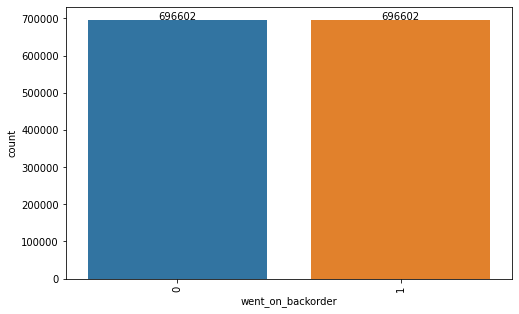

In [52]:
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(Y_train_sm)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        Y_train_sm.value_counts()[i],ha="center")
    i += 1

The data is now balanced as seen from the bar charts

### Model Training

In [54]:
# training models with sampled and unsampled data and compare the results

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

Before we go further we need clarity on what metrics to focus on, and therefore:

Precision: Among all the predictions that are "Yes" how many are actually "Yes".<br />
Recall: Among all the actuall "Yes" how many were correctly predicted as "Yes".<br />

Here in this case, the Supply Chain Manager should be interested in maximizing the number of True Backoreders, care should be take that the backorders are not mis-classified as Not-Backorder, although the vice-versa could happen. In other words company has higher cost of misclassifing the Backorders than misclassifing the Not-Backorder. 

Becasue of these differences in the costs of misclassifications, we have to  priortize companie's interests and in this case the Recall Value should be should be given importance to allign the model with companies interest.



In [56]:
# defining a function for monitoring the metrics

In [57]:
def metrics_report(model, xtest, ytest):
    pred= model.predict(xtest)
    print("METRICS:\n=================================================")
    print(f"accuracy score: {accuracy_score(ytest, pred):.5f}\n")
    print(f"Classification report: \n\tPrecision: {precision_score(ytest, pred):.5f} \n\tRecall Score: {recall_score(ytest, pred):.5f}\n\tF1 Score: {f1_score(ytest, pred):.5f}\n")
    print(f"Confusion Matrix: \nPredicted \n    -      +\n   No     Yes\n {confusion_matrix(ytest, pred)}\n")
    

In [58]:
# Starting with Naive Bayes Classifier

In [59]:
gnb=GaussianNB()
gnb.fit(X_train, Y_train)

gnb_smote=GaussianNB()
gnb_smote.fit(X_train_sm, Y_train_sm)

GaussianNB()

In [60]:
# Metrics Report for Gaussian Classifier with and without SMOTE
print("---- Gaussian Naive Bayes Classifier on Unsampled dataset ----\n")
metrics_report(gnb, X_test, Y_test)

print("---- Gaussian Naive Bayes Classifier on SMOTE sampled dataset ----\n")
metrics_report(gnb, X_test, Y_test)

---- Gaussian Naive Bayes Classifier on Unsampled dataset ----

METRICS:
accuracy score: 0.06801

Classification report: 
	Precision: 0.00893 
	Recall Score: 0.98309
	F1 Score: 0.01771

Confusion Matrix: 
Predicted 
    -      +
   No     Yes
 [[ 20625 322448]
 [    50   2907]]

---- Gaussian Naive Bayes Classifier on SMOTE sampled dataset ----

METRICS:
accuracy score: 0.06801

Classification report: 
	Precision: 0.00893 
	Recall Score: 0.98309
	F1 Score: 0.01771

Confusion Matrix: 
Predicted 
    -      +
   No     Yes
 [[ 20625 322448]
 [    50   2907]]



In [61]:
# Next we will try Random Forests

In [62]:
# hytperparameter optimization

In [65]:
# Random forest without sampling
randfor = RandomForestClassifier(n_jobs = -1, 
                                 n_estimators = 100, 
                                 max_depth = 8, 
                                 class_weight = 'balanced', 
                                 max_features = None)

randfor.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=None,
                       n_jobs=-1)

In [66]:
# Random forest with SMOTE sampling
randfor_smote = RandomForestClassifier(n_jobs = -1, 
                                       n_estimators = 100, 
                                       max_depth = 8, 
                                       class_weight = 'balanced', 
                                       max_features = None)

randfor_smote.fit(X_train_sm, Y_train_sm)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=None,
                       n_jobs=-1)

In [68]:
# Metrics Report for Random Forests with and without SMOTE
print("---- Random Forests Classifier on Unsampled dataset ----\n")
metrics_report(randfor, X_test, Y_test)

print("---- Random Forests Classifier on SMOTE sampled dataset ----\n")
metrics_report(randfor_smote, X_test, Y_test)

---- Random Forests Classifier on Unsampled dataset ----

METRICS:
accuracy score: 0.89178

Classification report: 
	Precision: 0.06452 
	Recall Score: 0.86405
	F1 Score: 0.12007

Confusion Matrix: 
Predicted 
    -      +
   No     Yes
 [[306028  37045]
 [   402   2555]]

---- Random Forests Classifier on SMOTE sampled dataset ----

METRICS:
accuracy score: 0.87845

Classification report: 
	Precision: 0.05624 
	Recall Score: 0.83801
	F1 Score: 0.10541

Confusion Matrix: 
Predicted 
    -      +
   No     Yes
 [[301491  41582]
 [   479   2478]]



In [71]:
# boosting, we will go with XGBoosting as it is fast compared with gradient boosting.

In [72]:
xgb_model=xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 8, alpha = 10, n_estimators = 100)

xgb_model.fit(X_train, Y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
xgb_smote=xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 8, alpha = 10, n_estimators = 100)

xgb_smote.fit(X_train_sm, Y_train_sm)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
# Metrics Report for XGBoosting and without without SMOTE
print("---- XGBoosting Classifier on Unsampled dataset ----\n")
metrics_report(xgb_model, X_test, Y_test)

# Metrics Report for XGBoosting with SMOTE Sampled Dataset
print("---- XGBoosting Classifier on SMOTE sampled dataset ----\n")
metrics_report(xgb_smote, X_test, Y_test)

---- XGBoosting Classifier on Unsampled dataset ----

METRICS:
accuracy score: 0.99162

Classification report: 
	Precision: 0.60985 
	Recall Score: 0.05445
	F1 Score: 0.09997

Confusion Matrix: 
Predicted 
    -      +
   No     Yes
 [[342970    103]
 [  2796    161]]

---- XGBoosting Classifier on SMOTE sampled dataset ----

METRICS:
accuracy score: 0.96140

Classification report: 
	Precision: 0.13441 
	Recall Score: 0.64660
	F1 Score: 0.22256

Confusion Matrix: 
Predicted 
    -      +
   No     Yes
 [[330760  12313]
 [  1045   1912]]



In [76]:
# Lets create a function to print all the metrics for the models generated above.
def metrics_table(models_list, model_names, Xtest, Ytest):
    accuracy=[]
    precision=[]
    recall=[]
    f1_scores=[]
    model_name=[]
    for model, name in list(zip(models_list, model_names)):
        pred=model.predict(X)
        model_name.append(name)
        accuracy.append(accuracy_score(Y, pred))
        precision.append(precision_score(Y, pred))
        recall.append(recall_score(Y, pred))
        f1_scores.append(f1_score(Y, pred))
    result= pd.DataFrame({'Model': model_name,
                          'Accuracy': accuracy,
                         'Precision': precision,
                         'Recall': recall,
                         'F1-score': f1_scores})
    result= result.set_index('Model')
    return result

In [77]:
metrics_table([gnb, gnb_smote, randfor, randfor_smote, xgb_model, xgb_smote ],
             ['Guassian Naive Bayes', 'Guassian Naive Bayes(SMOTE)', 'Random Forests', 'Random Forests (SMOTE)', 'XGBoosting','XGBoosting(SMOTE)'],
             X_test,
             Y_test)

,Accuracy,Precision,Recall,F1-score
Model,,,,
Guassian Naive Bayes,0.067899,0.008868,0.982472,0.017578
Guassian Naive Bayes(SMOTE),0.073562,0.008918,0.982022,0.017676
Random Forests,0.893048,0.066615,0.891573,0.123968
Random Forests (SMOTE),0.879091,0.057227,0.855955,0.107282
XGBoosting,0.992077,0.803901,0.087978,0.158598
XGBoosting(SMOTE),0.963262,0.153200,0.735169,0.253560


From the above results the Random Forests model without sampling has good balance between accuracy and Recall. Hence the random forst is the best model to predict the Backorders for the given data set.

We can say this more confidenly with the help of ROC curves and Precision- Recall curves


In [89]:
# ROC and AUC curve

In [90]:
# Creating a function for ROC curve

In [91]:
def roc_auc(X, Y, model):
    fpr_, tpr_, thresholds=roc_curve(Y, model.predict_proba(X)[:,0], pos_label=0)
    auc_model=auc(fpr_, tpr_)
    return fpr_, tpr_, auc_model   

def plot_roc_curve(frp, trp,  auc=None, model_name=None):
    plt.plot(frp, trp, linewidth=3, label= f'AUC({model_name})={round(auc,3)}')
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (1- Specificity)')
    plt.ylabel('True Positive Rate (Sensicivity)')
    plt.legend(loc="lower right",fontsize=10)
    return
    


In [92]:
# Creating a function for Precision recall curve

In [93]:
def prec_rec(X, Y, model):
    precision, recall, thresholds = precision_recall_curve(Y, model.predict_proba(X)[:,0], pos_label = 0)
    auc_model = auc(recall, precision)
    return precision, recall, auc_model

def plot_precrec_curve(precision, recall, auc = None, model_name = None):
    plt.plot(recall, precision, label = f'AUC ({model_name}) = {round(auc,3)}')             
    plt.xlabel('Recall')
    plt.ylabel ('Precision')
    plt.legend(loc="lower left", fontsize=11)
    return

In [94]:
models=[gnb, gnb_smote, randfor, randfor_smote, xgb_model, xgb_smote ]
model_names=['Guassian Naive Bayes', 'Guassian Naive Bayes(SMOTE)', 'Random Forests', 'Random Forests (SMOTE)', 'XGBoosting','XGBoosting(SMOTE)']

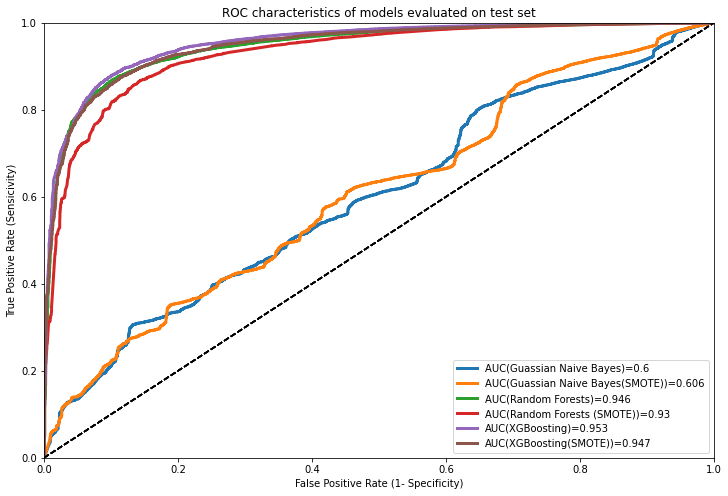

In [95]:
plt.figure(figsize = (12,8))

for model,name in list(zip(models, model_names)):
    fpr, tpr, auc_model = roc_auc(X_test, Y_test, model)
    plot_roc_curve(fpr, tpr, auc_model, model_name = name)

plt.title('ROC characteristics of models evaluated on test set')
plt.show()

The ROC characteristics also show that the Random forest model trained on the Original Dataset has the highest Area under the ROC curve(AUC). A good classifier will reach the highest possible TPR (Y-axis) while keeping of FPR (X-axis)low. And therefore the curve of a good classifier will tend to be closer to the top left corner of the plot. This also consequentially increases the Area under the curve.

When we increase our classification threshold probability (Default threshold is 0.5), we will classify more positive values correctly (TPR) but will also classify more neagtive values as positive as a result (FPR).

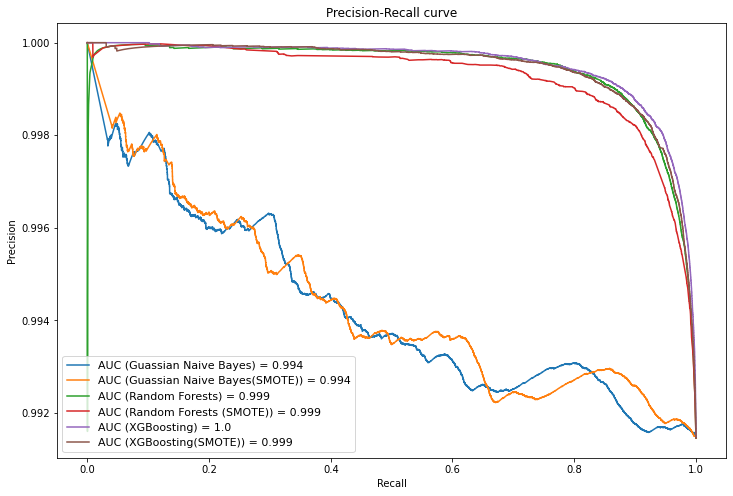

In [97]:
plt.figure(figsize = (12,8))

for model,name in list(zip(models, model_names)):
    precision, recall, auc_model = prec_rec(X_test, Y_test, model)
    plot_precrec_curve(precision, recall, auc_model, model_name = name)

plt.title('Precision-Recall curve')
plt.show()

The precision-recall curves of the models give the same inferences as that from the ROC curves. The Random Forest model trained on the original dataset is the best model here again due to its highest AUC value. 

Intuitively, we would like both precision and recall to be as high as possible. Hence the better model should have its curve closer to the top right of the plot (~1.0 recall and ~1.0 precision) compared to other curves.

**With all the results and plots, we can confidently select the Random Forest with original dataset as our final prediction model.**

This threshold can be tweaked for individual requirements consulting both the ROC curve and Precision - Recall curve of the model. As always, tweaking the threshold involves making a tradeoff between Precision-Recall and TPR-FPR. 

Based on business requirements/Strategy, a threshold value can be decided. Personally, I would choose a model that has a good balance of accuracy and recall. 

Recall is important as you wouldn't want to miscclassify backorders as non-backorders at any cost but wouldn't mind if a few non-backorders are mistakenly classified as backorders. In statistical terms, the cost of missclassification of backorders as non-backorders (False Negative) is much higher than the cost of missclassifying non-backorders as backorders (False Positive).